<a href="https://colab.research.google.com/github/Blutronics/BakeryAssociationRule/blob/main/bakery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install kmodes
from kmodes.kmodes import KModes

In [93]:
df=pd.read_csv('Bakery.csv')
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 9:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [95]:
df.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

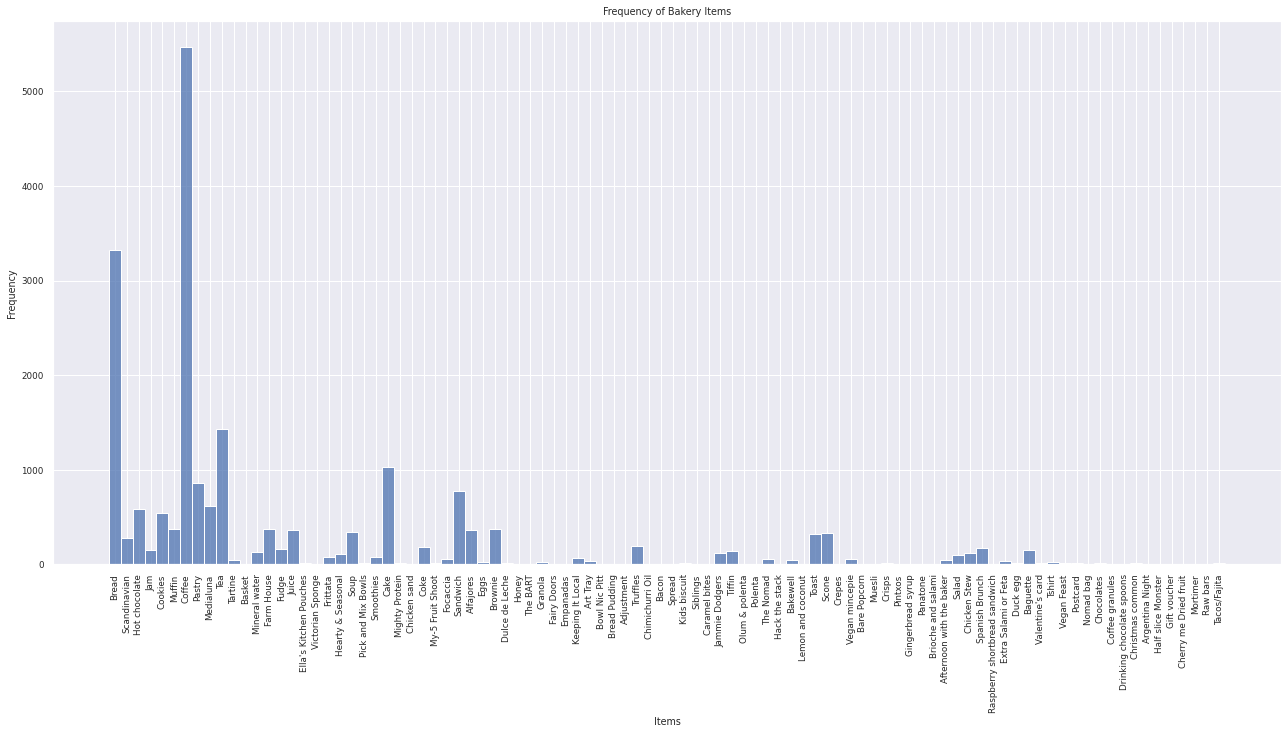

In [97]:
sns.histplot(df.Items)
sns.set(rc = {'figure.figsize':(22,10)}, font_scale = 0.8)
plt.xticks(list(range(0, len(pd.unique(df.Items))), ), rotation=90, ha = "center")
plt.title("Frequency of Bakery Items")
plt.xlabel("Items")
plt.ylabel("Frequency")
plt.show()

# **Market Basket Analysis for Bakery Items**

In [98]:
dfti=df[['TransactionNo','Items']]
dfti.head()

,TransactionNo,Items
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam


In [100]:
# dfti.TransactionNo.groupby(dfti.Items)

In [101]:
#dfti=pd.get_dummies(dfti,drop_first=True)
# dfti.head()

In [102]:

items=[]
for i in dfti.groupby('TransactionNo')['Items'].apply(list):
    items.append(i)
#items

In [103]:
all_items=[i for item in items for i in item]
#all_items


In [104]:
from collections import Counter

In [105]:
item_frequencies=Counter(all_items)
#item_frequencies

In [106]:
item_frequencies=sorted(item_frequencies.items(),key=lambda x:x[1])
#item_frequencies

In [107]:
itemfreqs=list(reversed([i[1] for i in item_frequencies]))
item=list(reversed([i[0] for i in item_frequencies]))
itemfreqs[0:12]

[5471, 3325, 1435, 1025, 856, 771, 616, 590, 540, 379, 374, 370]

In [108]:
import matplotlib.pyplot as plt

In [109]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


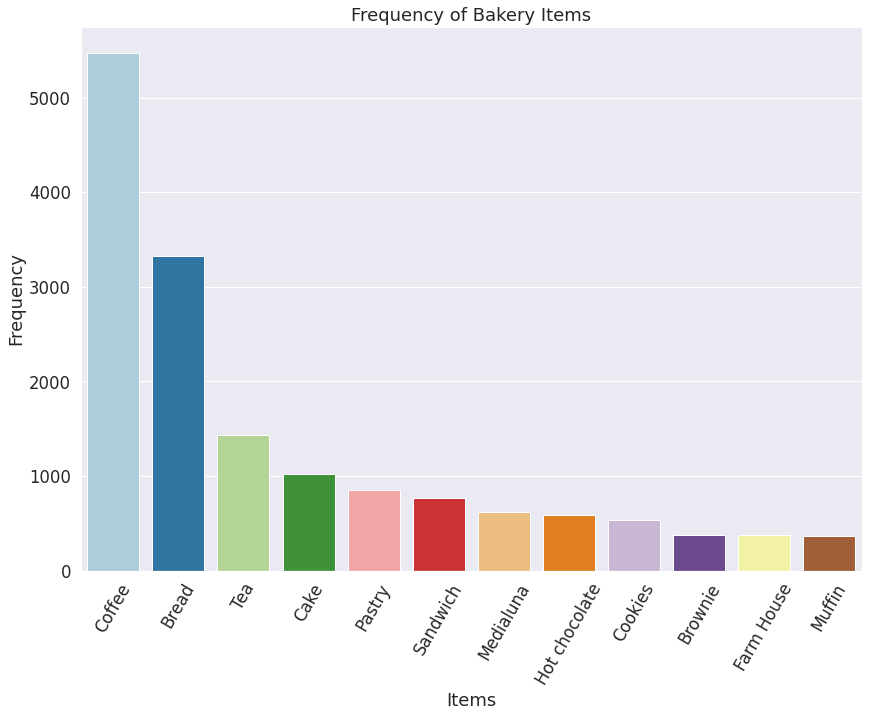

In [111]:
sns.barplot(item[0:12],itemfreqs[0:12])
plt.title("Frequency of Bakery Items")
plt.xlabel("Items")
plt.ylabel("Frequency")
sns.set(rc = {'figure.figsize':(14,10)}, font_scale = 1.5)
# sns.set(font_scale = 2)
sns.set_palette("Paired", 12)
plt.xticks(list(range(0, 12), ), item[0:12],rotation=60)
plt.show()

# **Association Rule**

In [112]:
item_series=pd.DataFrame(pd.Series(items))
item_series=item_series.iloc[:9465,:]
item_series

,0
0,[Bread]
1,"[Scandinavian, Scandinavian]"
2,"[Hot chocolate, Jam, Cookies]"
3,[Muffin]
4,"[Coffee, Pastry, Bread]"
...,...
9460,[Bread]
9461,"[Truffles, Tea, Spanish Brunch, Christmas common]"
9462,"[Muffin, Tacos/Fajita, Coffee, Tea]"
9463,"[Coffee, Pastry]"


In [113]:
item_series.columns=["transactions"]

In [114]:
df_dummy=item_series["transactions"].str.join(sep='*').str.get_dummies(sep='*')
dummy_copy=df_dummy
dummy_copy.head()

# currious why we make a copy of the df_dummy dateframe here?

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets=apriori(df_dummy, min_support=0.01, max_len=4, use_colnames=True)

In [116]:
frequent_itemsets.sort_values('support',ascending=False,inplace=True)

In [117]:
labels = frequent_itemsets.itemsets[0:11]
labels

6            (Coffee)
2             (Bread)
26              (Tea)
4              (Cake)
34    (Bread, Coffee)
19           (Pastry)
21         (Sandwich)
16        (Medialuna)
12    (Hot chocolate)
42     (Cake, Coffee)
8           (Cookies)
Name: itemsets, dtype: object

In [118]:
formattedLabels = []
for i in labels:
  i = str(i)
  # print(i[12:-3])
  formattedLabels.append(i[12:-3])

In [119]:
formattedLabels

['Coffee',
 'Bread',
 'Tea',
 'Cake',
 "Bread', 'Coffee",
 'Pastry',
 'Sandwich',
 'Medialuna',
 'Hot chocolate',
 "Cake', 'Coffee",
 'Cookies']

In [120]:
frequent_itemsets.support[0:11]

6     0.478394
2     0.327205
26    0.142631
4     0.103856
34    0.090016
19    0.086107
21    0.071844
16    0.061807
12    0.058320
42    0.054728
8     0.054411
Name: support, dtype: float64

In [121]:
frequent_itemsets.itemsets[0:11]

6            (Coffee)
2             (Bread)
26              (Tea)
4              (Cake)
34    (Bread, Coffee)
19           (Pastry)
21         (Sandwich)
16        (Medialuna)
12    (Hot chocolate)
42     (Cake, Coffee)
8           (Cookies)
Name: itemsets, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


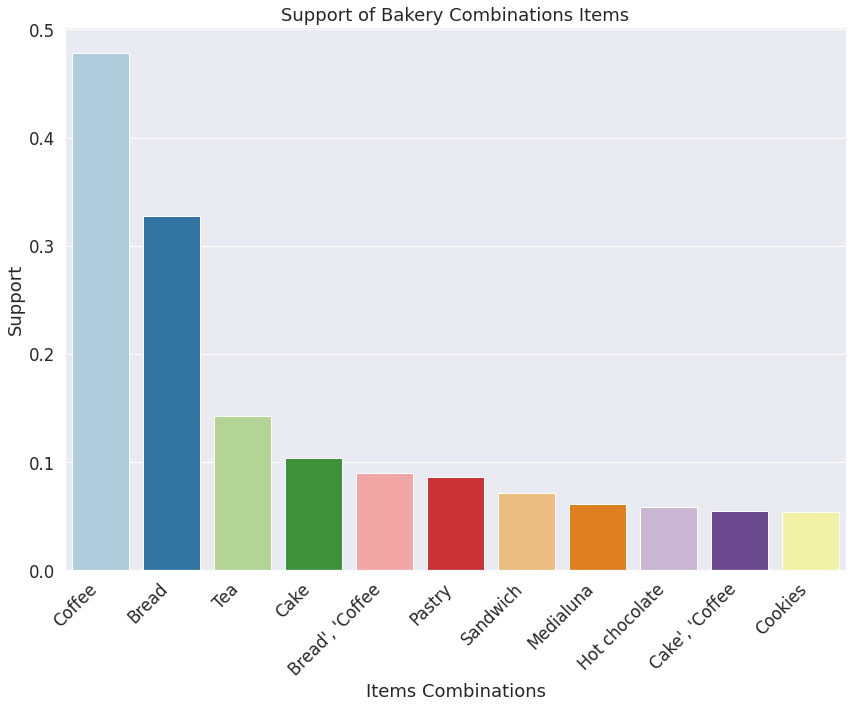

In [122]:
sns.barplot(formattedLabels,frequent_itemsets.support[0:11])
plt.title("Support of Bakery Combinations Items")
plt.xlabel("Items Combinations")
plt.ylabel("Support")
sns.set(rc = {'figure.figsize':(14,10)}, font_scale = 1.5)
# sns.set(font_scale = 2)
sns.set_palette("Paired", 12)
plt.xticks(list(range(0, 11), ), formattedLabels, rotation=45, ha = "right")
plt.show()

In [123]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779
39,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
30,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
31,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
15,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
14,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
17,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699
16,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
33,(Pastry),"(Bread, Coffee)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033
32,"(Bread, Coffee)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749


In [124]:
usefulDf = df
moreUsefulDf =  usefulDf.drop_duplicates()
moreUsefulDf
muDf = moreUsefulDf

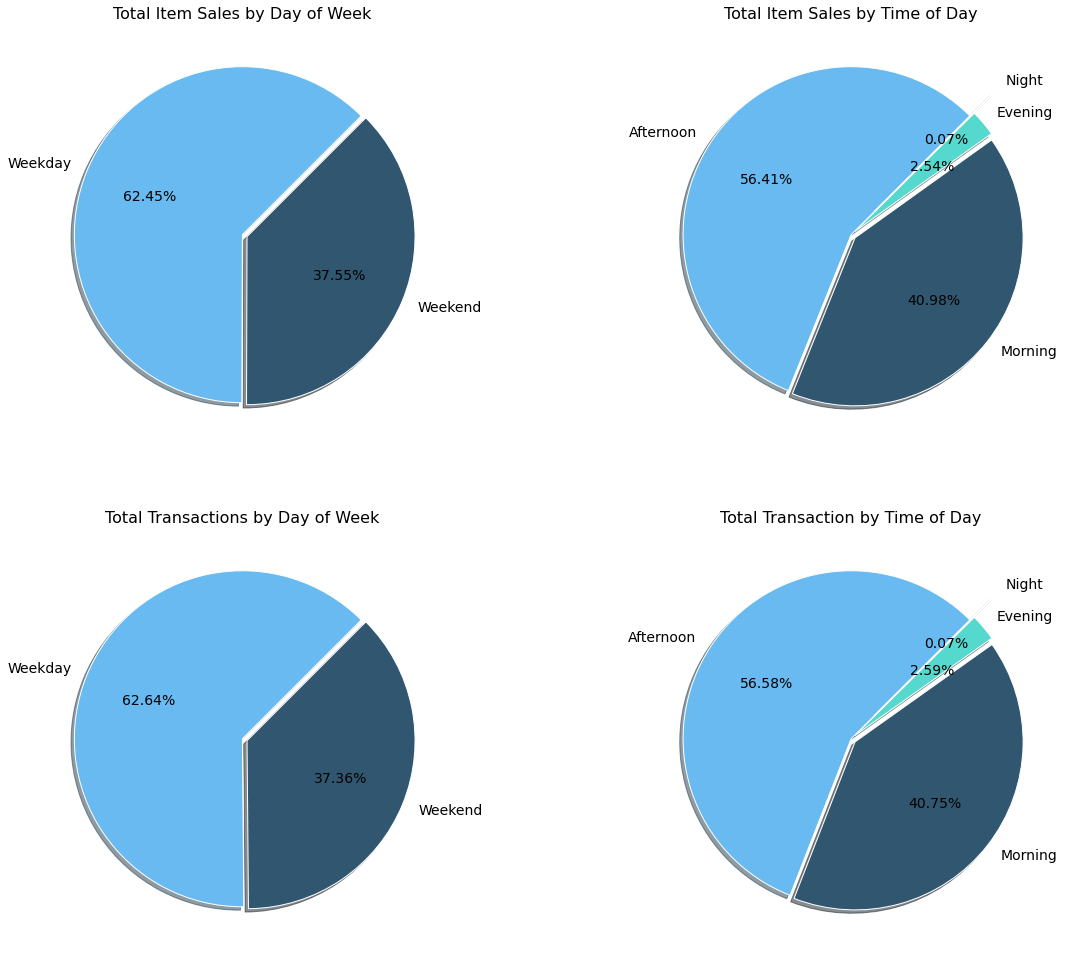

In [126]:
colorrr = ["#69BAF0", "#315770"]
colorrr2 = ["#69BAF0", "#315770","#55D9CE", "#ffffff"]
fig = plt.figure(figsize = (20, 17))
plt.subplot(2, 2, 1)
plt.pie(df.DayType.value_counts(),
        labels = ["Weekday", "Weekend"],
        startangle = 45,
        autopct = '%1.2f%%',
        colors = colorrr,
        shadow = True,
        explode = [0,.03],
        textprops={'color':"black",'fontsize': 14}
        )
plt.title('Total Item Sales by Day of Week',color='black',fontsize= 16)
plt.plot()


plt.subplot(2, 2, 2)


plt.pie(df.Daypart.value_counts(),
        labels = ["Afternoon", "Morning", "Evening","Night"],
        textprops={'color':"black",'fontsize': 14},
        startangle = 45,
        autopct = '%1.2f%%',
        colors = colorrr2,
        shadow = True,
        explode = [0,.03,.03,.2]
        )
plt.plot()
plt.title('Total Item Sales by Time of Day',color='black',fontsize= 16)


plt.subplot(2, 2, 3)
plt.pie(muDf.DayType.value_counts(),
        labels = ["Weekday", "Weekend"],
        startangle = 45,
        autopct = '%1.2f%%',
        colors = colorrr,
        shadow = True,
        explode = [0,.03],
        textprops={'color':"black",'fontsize': 14}
        )
plt.title('Total Transactions by Day of Week',color='black',fontsize= 16)
plt.plot()


plt.subplot(2, 2, 4)


plt.pie(muDf.Daypart.value_counts(),
        labels = ["Afternoon", "Morning", "Evening","Night"],
        textprops={'color':"black",'fontsize': 14},
        startangle = 45,
        autopct = '%1.2f%%',
        colors = colorrr2,
        shadow = True,
        explode = [0,.03,.03,.2]
        )
plt.plot()
plt.title('Total Transaction by Time of Day',color='black',fontsize= 16)

plt.show()


In [138]:
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 9:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


In [147]:
tempDf = df.groupby(['Items', 'Daypart'])['Items'].count().unstack().fillna(0)

In [148]:
tempDf

Daypart,Afternoon,Evening,Morning,Night
Items,,,,
Adjustment,0.0,1.0,0.0,0.0
Afternoon with the baker,19.0,15.0,10.0,0.0
Alfajores,245.0,17.0,107.0,0.0
Argentina Night,3.0,0.0,4.0,0.0
Art Tray,31.0,2.0,5.0,0.0
...,...,...,...,...
Tshirt,0.0,21.0,0.0,0.0
Valentine's card,4.0,4.0,3.0,2.0
Vegan Feast,4.0,3.0,2.0,7.0


In [152]:
tempDf.columns

Index(['Afternoon', 'Evening', 'Morning', 'Night'], dtype='object', name='Daypart')

In [150]:
  tempDf.loc[tempDf[Items]=="Coffee"]

NameError: ignored

In [ ]:
df.Items.value_counts().sum()

20507

In [ ]:
print('Coffee Proportion =', 5471/20507)
print('Bread Proportion =', 3325/20507)
print('Tea Proportion =', 1435/20507)
print('Cake Proportion =', 1025/20507)
print('Pastry Proportion =', 856/20507)
print('Sandwich Proportion =', 771/20507)

Coffee Proportion = 0.26678695079728876
Bread Proportion = 0.16213975715609305
Tea Proportion = 0.06997610571999804
Cake Proportion = 0.04998293265714147
Pastry Proportion = 0.04174184424830546
Sandwich Proportion = 0.03759691812551812


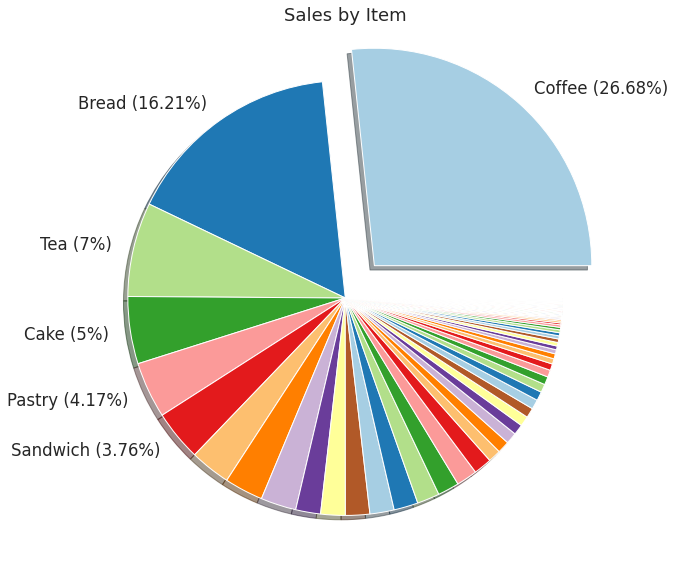

In [55]:
fig = plt.figure(figsize = (10, 10))
plt.title('Sales by Item')

x = df.Items.value_counts()

# y = np.array([26.68, 16.21, 7, 5, 4.17, 3.76])
mylabels = ["Coffee (26.68%)", "Bread (16.21%)", "Tea (7%)", "Cake (5%)", "Pastry (4.17%)", "Sandwich (3.76%)",'','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','']
myexplode = [0.2, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

plt.pie(x, labels = mylabels, explode = myexplode, shadow = True)

plt.show()

# EDA Insights: 

- 0. Weekdays are more profitable, with 60% of sales occurring on weekday days. 
- 1. Fewer that 1% of sales occur during the hours designated as night and only 2.5% during the hours designated as evening:
  - As inconvenient as it might be for the patrons (especially dedicated/ loyal night-time customers), NOT OPERATING DURING THESE HOURS would likely increase profits by decreasing the operational costs (employee salary/ wages, utilities, insurance premiums for operating a cash business during periods more prone to (potentially violent) robbery/ theft, *etc.*) to a degree that more than offsets and loss in sales revenue.
- 2. Folks love coffee, bread, tea, pastries, cakes, & sammiches:
  - INCREASING STOCK & VARIETY of such items might increase sales revenue; 
  - as might CREATING PROMOTIONAL OFFERS tailored to the sale of these items; this insight should dovetail w/ those from the Market-Basket Analysis.

In [56]:
df.Items = df.Items.replace({'Bread': 0, 'Scandinavian': 1, 'Hot chocolate': 2, 'Jam': 3, 'Cookies': 4,
       'Muffin': 5, 'Coffee': 6, 'Pastry': 7, 'Medialuna': 8, 'Tea': 9, 'Tartine': 10,
       'Basket': 11, 'Mineral water': 12, 'Farm House': 13, 'Fudge': 14, 'Juice': 15,
       "Ella's Kitchen Pouches": 16, 'Victorian Sponge': 17, 'Frittata': 18,
       'Hearty & Seasonal': 19, 'Soup': 20, 'Pick and Mix Bowls': 21, 'Smoothies': 22,
       'Cake': 23, 'Mighty Protein': 24, 'Chicken sand': 25, 'Coke': 26,
       'My-5 Fruit Shoot': 27, 'Focaccia': 28, 'Sandwich': 29, 'Alfajores': 30, 'Eggs': 31,
       'Brownie': 32, 'Dulce de Leche': 33, 'Honey': 34, 'The BART': 35, 'Granola': 36,
       'Fairy Doors': 37, 'Empanadas': 38, 'Keeping It Local': 39, 'Art Tray': 40,
       'Bowl Nic Pitt': 41, 'Bread Pudding': 42, 'Adjustment': 43, 'Truffles': 44,
       'Chimichurri Oil': 45, 'Bacon': 46, 'Spread': 47, 'Kids biscuit': 48, 'Siblings': 49,
       'Caramel bites': 50, 'Jammie Dodgers': 51, 'Tiffin': 52, 'Olum & polenta': 53,
       'Polenta': 54, 'The Nomad': 55, 'Hack the stack': 56, 'Bakewell': 57,
       'Lemon and coconut': 58, 'Toast': 59, 'Scone': 60, 'Crepes': 61, 'Vegan mincepie': 62,
       'Bare Popcorn': 63, 'Muesli': 64, 'Crisps': 65, 'Pintxos': 66, 'Gingerbread syrup': 67,
       'Panatone': 68, 'Brioche and salami': 69, 'Afternoon with the baker': 70,
       'Salad': 71, 'Chicken Stew': 72, 'Spanish Brunch': 73,
       'Raspberry shortbread sandwich': 74, 'Extra Salami or Feta': 75,
       'Duck egg': 76, 'Baguette': 77, "Valentine's card": 78, 'Tshirt': 79,
       'Vegan Feast': 80, 'Postcard': 81, 'Nomad bag': 82, 'Chocolates': 83,
       'Coffee granules': 84, 'Drinking chocolate spoons': 85, 'Christmas common': 86,
       'Argentina Night': 87, 'Half slice Monster': 88, 'Gift voucher': 89,
       'Cherry me Dried fruit': 90, 'Mortimer': 91, 'Raw bars': 92, 'Tacos/Fajita': 93})

In [57]:
df.Items.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93])

In [58]:
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,0,2016-10-30 9:58:11,Morning,Weekend
1,2,1,2016-10-30 10:05:34,Morning,Weekend
2,2,1,2016-10-30 10:05:34,Morning,Weekend
3,3,2,2016-10-30 10:07:57,Morning,Weekend
4,3,3,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,6,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,9,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,6,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,7,2017-09-04 14:57:06,Afternoon,Weekend


In [59]:
df.Daypart.unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

In [60]:
df.Daypart = df['Daypart'].replace({'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3})

In [61]:
df.Daypart.unique()

array([0, 1, 2, 3])

In [62]:
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,0,2016-10-30 9:58:11,0,Weekend
1,2,1,2016-10-30 10:05:34,0,Weekend
2,2,1,2016-10-30 10:05:34,0,Weekend
3,3,2,2016-10-30 10:07:57,0,Weekend
4,3,3,2016-10-30 10:07:57,0,Weekend
...,...,...,...,...,...
20502,9682,6,2017-09-04 14:32:58,1,Weekend
20503,9682,9,2017-09-04 14:32:58,1,Weekend
20504,9683,6,2017-09-04 14:57:06,1,Weekend
20505,9683,7,2017-09-04 14:57:06,1,Weekend


In [63]:
df.DayType.unique()

array(['Weekend', 'Weekday'], dtype=object)

In [64]:
df.DayType = df.DayType.replace({'Weekend': 0, 'Weekday': 1})

In [65]:
df.DayType.unique()

array([0, 1])

In [66]:
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,0,2016-10-30 9:58:11,0,0
1,2,1,2016-10-30 10:05:34,0,0
2,2,1,2016-10-30 10:05:34,0,0
3,3,2,2016-10-30 10:07:57,0,0
4,3,3,2016-10-30 10:07:57,0,0
...,...,...,...,...,...
20502,9682,6,2017-09-04 14:32:58,1,0
20503,9682,9,2017-09-04 14:32:58,1,0
20504,9683,6,2017-09-04 14:57:06,1,0
20505,9683,7,2017-09-04 14:57:06,1,0


In [67]:
df.DateTime.unique()

array(['2016-10-30 9:58:11', '2016-10-30 10:05:34', '2016-10-30 10:07:57',
       ..., '2017-09-04 14:32:58', '2017-09-04 14:57:06',
       '2017-09-04 15:04:24'], dtype=object)

In [68]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

df['DateTime'] = df['DateTime'].dt.strftime('%Y')

# df['DateTime'] = df['DateTime'].dt.strftime('%Y-%m')

In [69]:
df.DateTime.unique()

array(['2016', '2017'], dtype=object)

In [72]:
df.DateTime = pd.to_numeric(df.DateTime)

In [73]:
df.rename(columns = {'DateTime': 'Year', 'Daypart': 'Morning:0, Afternoon:1, Evening:2, Night:3', 'DayType': 'Weekend:0, Weekday:1'}, inplace = True)

In [74]:
df

,TransactionNo,Items,Year,"Morning:0, Afternoon:1, Evening:2, Night:3","Weekend:0, Weekday:1"
0,1,0,2016,0,0
1,2,1,2016,0,0
2,2,1,2016,0,0
3,3,2,2016,0,0
4,3,3,2016,0,0
...,...,...,...,...,...
20502,9682,6,2017,1,0
20503,9682,9,2017,1,0
20504,9683,6,2017,1,0
20505,9683,7,2017,1,0


## **KMode Cluster**

In [127]:
df=pd.read_csv('Bakery.csv')

In [128]:
new_df=df[['TransactionNo','Daypart', 'DayType']]
new_df

,TransactionNo,Daypart,DayType
0,1,Morning,Weekend
1,2,Morning,Weekend
2,2,Morning,Weekend
3,3,Morning,Weekend
4,3,Morning,Weekend
...,...,...,...
20502,9682,Afternoon,Weekend
20503,9682,Afternoon,Weekend
20504,9683,Afternoon,Weekend
20505,9683,Afternoon,Weekend


In [129]:
new_df['PartType']=new_df['Daypart']+ ' ' + new_df['DayType']
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TransactionNo,Daypart,DayType,PartType
0,1,Morning,Weekend,Morning Weekend
1,2,Morning,Weekend,Morning Weekend
2,2,Morning,Weekend,Morning Weekend
3,3,Morning,Weekend,Morning Weekend
4,3,Morning,Weekend,Morning Weekend


In [130]:
days=[]
for i in new_df.groupby('TransactionNo')['PartType'].apply(list):
    days.append(i)

#days

In [132]:
df_drop = new_df.drop_duplicates()
df_drop

,TransactionNo,Daypart,DayType,PartType
0,1,Morning,Weekend,Morning Weekend
1,2,Morning,Weekend,Morning Weekend
3,3,Morning,Weekend,Morning Weekend
6,4,Morning,Weekend,Morning Weekend
7,5,Morning,Weekend,Morning Weekend
...,...,...,...,...
20495,9680,Afternoon,Weekend,Afternoon Weekend
20496,9681,Afternoon,Weekend,Afternoon Weekend
20500,9682,Afternoon,Weekend,Afternoon Weekend
20504,9683,Afternoon,Weekend,Afternoon Weekend


In [133]:
days=[]
for i in df_drop.groupby('TransactionNo')['PartType'].apply(list):
    days.append(i)



In [134]:
df_drop = df_drop.reset_index(drop=True)

**Completed dataframe encoding**

In [135]:
df_dummy['PartType']=df_drop.PartType
df_dummy.head()
#Dataframe for dummy variables and Daytype/DayType

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge,PartType
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Morning Weekend


**Compute Number of Clusters for Model using Elbow Curve**

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 25027.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 25027.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 25027.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 25027.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 25027.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 991, cost: 20499.0
Run 1, iteration: 2/100, moves: 0, cost: 20499.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3414, cost: 21055.0
Init: initializing ce

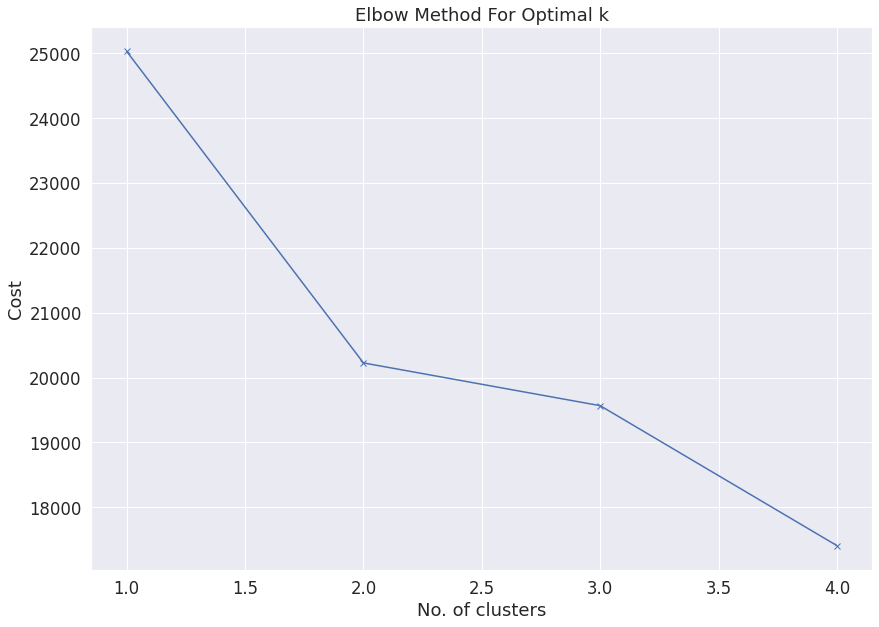

In [136]:
# Elbow curve to find optimal K
data = df_dummy
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

**Compute Kmodes Model**

In [137]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1414, cost: 21205.0
Run 1, iteration: 2/100, moves: 1763, cost: 20620.0
Run 1, iteration: 3/100, moves: 0, cost: 20620.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 978, cost: 20946.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2929, cost: 20620.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3161, cost: 21055.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1074, cost: 20499.0
Best run was number 5


array([0, 0, 0, ..., 1, 1, 0], dtype=uint16)

**Add clusters to dataframe**

In [ ]:
kmode.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(kmode.labels_)  # converting numpy array into pandas series object 
data['clust'] = mb # creating a  new column and assigning it to new column 

In [ ]:
data.groupby(data.clust).apply(pd.DataFrame.mode).reset_index(drop=True)

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge,PartType,clust
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Morning Weekday,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Afternoon Weekday,1


In [ ]:
data.groupby(data.clust).mean()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
clust,,,,,,,,,,,,,,,,,,,,,
0,0.000171,0.005294,0.039105,0.001025,0.004781,0.000171,0.015540,0.006148,0.000683,0.000854,...,0.000000,0.007172,0.016223,0.043716,0.017077,0.003415,0.002049,0.002561,0.006489,0.000683
1,0.000000,0.003325,0.031865,0.000277,0.002771,0.000000,0.016902,0.003325,0.000277,0.000277,...,0.000277,0.004433,0.014131,0.017179,0.025492,0.000277,0.000277,0.000277,0.003879,0.000831


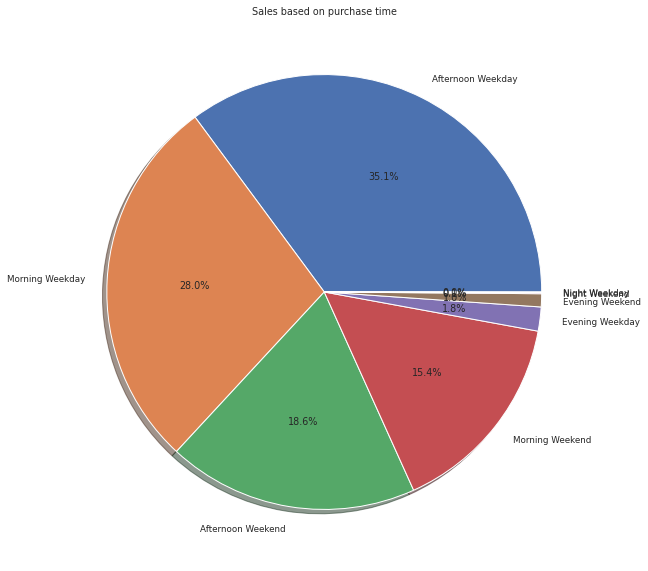

In [ ]:
fig = plt.figure(figsize = (10, 10))

label = ['Afternoon Weekday', 'Morning Weekday', 'Afternoon Weekend', 'Morning Weekend', 'Evening Weekday','Evening Weekend','Night Weekend','Night Weekday ']

plt.pie(df_dummy["PartType"].value_counts(), shadow = True,autopct='%1.1f%%',labels = label)
plt.title('Sales based on purchase time')
plt.show()

In [ ]:
df_dummy["PartType"].value_counts()

Afternoon Weekday    3325
Morning Weekday      2648
Afternoon Weekend    1764
Morning Weekend      1455
Evening Weekday       169
Evening Weekend        92
Night Weekend           9
Night Weekday           3
Name: PartType, dtype: int64